## Data Set Up

In [36]:
library(dplyr)
library(tidyr)
library(ggplot2)

county = read.table("county_complete1.csv", sep = ",", header = TRUE)

# Filter state to Minnesota
minn = filter(county, state == 'Minnesota')

# Selected variables to use for analysis
minn_poverty = select(minn, 'name','pop2016', 'pop2017', 'pop_2019', 'poverty_age_under_18_2017', 
                      'poverty_under_18_2019', 'poverty_2016', 'poverty_2017', 'poverty_2019',
                       'median_household_income_2016', 'median_household_income_2017', 
                      'median_household_income_2019', 'hs_grad_2016', 'hs_grad_2017', 
                     'hs_grad_2019', 'bachelors_2016', 'bachelors_2017', 'bachelors_2019', 
                     'unemployment_rate_2017', 'unemployment_rate_2019', 'uninsured_2017', 'uninsured_2019',
                      'uninsured_age_under_19_2017', 'uninsured_under_19_2019', 
                      'per_capita_income_2017','per_capita_income_2019')
minn_poverty = arrange(minn_poverty, name)

# Shortened each county name
minn_poverty$names = c("Aitkin", "Anoka", "Becker", "Beltrami",
                      "Benton", "Big Stone", "Blue Earth", "Brown", 
                      "Carlton", "Carver", "Cass",
                      "Chippewa", "Chisago", "Clay", "Clearwater",
                      "Cook", "Cottonwood", "Crow Wing", "Dakota",
                      "Dodge", "Douglas", "Faribault", "Fillmore",
                      "Freeborn", "Goodhue", "Grant", "Hennepin",
                      "Houston", "Hubbard", "Isanti", "Itasca",
                      "Jackson", "Kanabec", "Kandiyohi", "Kittson",
                      "Koochiching"," Lac qui Parle", "Lake",
                      "Lake of the Woods", "Le Sueur", "Lincoln", "Lyon",
                      "Mahnomen", "Marshall",
                      "Martin", "McLeod", "Meeker", "Mille Lacs",
                      "Morrison", "Mower"," Murray", "Nicollet",
                      "Nobles", "Norman", "Olmsted", "Otter Tail",
                      "Pennington", "Pine", "Pipestone", "Polk", 
                      "Pope", "Ramsey", "Red Lake", "Redwood", 
                      "Renville", "Rice", "Rock", "Roseau",
                      "Scott", "Sherburne", "Sibley",
                      "St. Louis", "Stearns", "Steele", "Stevens",
                      "Swift", "Todd", "Traverse", 'Wabasha',
                      'Wadena', "Waseca", "Washington", "Watonwan",
                      "Wilkin", "Winona", "Wright", "Yellow Medicine")

# Updated NA values (this was pulled from the Census Bureau)
minn_poverty$poverty_under_18_2019 = c(18.0, 7.7, 15.8, 24.8, 11.3, 10.0, 11.8, 8.2, 12.0, 3.6,
                                 23.2, 9.0, 6.7, 13.7, 18.9, 15.6, 10.9, 14.7, 8.0, 5.0, 8.2, 16.8,
                                 17.5, 15.6, 13.3, 13.1, 13.3, 10.1, 17.0, 8.8, 15.9, 9.9, 11.7, 15.5,
                                 12.7, 19.2, 7.1, 12.1, 20.4, 12.8, 12.7, 18.4, 33.8, 7.6,
                                 18.9, 11.2, 7.1, 17.1, 10.8, 18.2, 7.4, 9.1, 19.2, 9.7, 10.4,
                                 11.4, 17.7, 12.7, 15.4, 18.0, 7.2, 20.6, 13.9, 13.2, 13.3, 13.3, 10.2,
                                 11.3, 7.3, 8.4, 10.5, 14.5, 16.8, 11.5, 6.1, 18.2, 16.8, 11.7, 8.5, 
                                 16.3, 10.0, 5.1, 20.8, 16.0, 10.1, 4.3, 12.3)

minn_poverty$poverty_2019 = c(12.2, 5.9, 11.0, 18.9, 10.3, 10.1, 17.6, 6.9, 11.3, 4.1, 13.6,
                                 9.3, 6.0, 12.3, 14.6, 12.6, 11.0, 10.8, 6.0, 5.1, 7.6, 11.5,
                                 10.7, 11.0, 9.3, 9.6, 10.4, 7.9, 11.8, 7.3, 12.2, 7.9, 10.0,
                                 10.5, 11.2, 13.6, 8.3, 8.7, 10.7, 8.5, 10.9, 14.1, 23.3, 6.9, 13.7,
                                 8.5, 6.7, 12.4, 10.2, 13.5, 7.1, 9.9, 13.6, 8.8, 8.4, 9.3, 11.0, 11.0, 11.7,
                                 11.8, 7.2, 14.0, 10.5, 10.1, 10.0, 9.2, 9.0, 8.1, 5.5, 6.4, 7.9, 14.1,
                                 12.9, 8.9, 12.4, 12.5, 11.9, 9.9, 7.7, 14.3, 9.7, 4.3, 13.4, 9.2, 12.9,
                                 4.6, 11.8)
#select(minn_poverty, 'name', 'poverty_under_18_2019', 'poverty_2019')

# Loading 2016, 2017, 2019 poverty demographics dataset
# Each variable consists of deeper view of the demographics of the population experiencing poverty

demo2016 = read.table("2016_poverty_demographics.csv", sep = ",", header = TRUE)
demo2017 = read.table("2017_poverty_demographics.csv", sep = ",", header = TRUE)
demo2018 = read.table("2018_poverty_demographics.csv", sep = ",", header = TRUE)
demo2019 = read.table("2019_poverty_demographics.csv", sep = ",", header = TRUE)

mdemo16 = filter(demo2016, state == 'Minnesota')
mdemo17 = filter(demo2017, state == 'Minnesota')
mdemo18 = filter(demo2018, state == 'Minnesota')
mdemo19 = filter(demo2019, state == 'Minnesota')


## Plot of Age Under 18 that are in Poverty for 2019

In [37]:
# Selecting State, Population of 2019, and Poverty under 18 in the 2019 population columns
poverty18 = select(minn_poverty, c('name','pop_2019', 'poverty_under_18_2019'))
#Adjust the Poverty rate under 18 to correct values because poverty under 18 is in %'s
poverty18$updated = (poverty18$pop_2019 * poverty18$poverty_under_18_2019)/100


fit <- lm(poverty_under_18_2019 ~ pop_2019, data = poverty18)
summary(fit)

# Plot graph in terms of Population in 2019 for each state by poverty under 18 in each state 
plot1 = ggplot(poverty18, aes(poverty18$pop_2019, poverty18$updated, color=poverty18$name)) + 
geom_point() +   stat_smooth(method = "lm", col = "black") +
ggtitle("Plot of Age Under 18 in Poverty (2019) in Minnesota by County ") + 
xlab("Population of County") + ylab("Citizens under 18 in Poverty") + labs(color = "County"); 
+  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
# Increase scale of graph
options(repr.plot.width=15, repr.plot.height=8)

# Plot graph 
plot1



Call:
lm(formula = poverty_under_18_2019 ~ pop_2019, data = poverty18)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3723 -3.3512 -0.4587  3.4093 20.6436 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.317e+01  5.876e-01  22.409   <2e-16 ***
pop_2019    -1.909e-06  3.520e-06  -0.542    0.589    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.062 on 85 degrees of freedom
Multiple R-squared:  0.003448,	Adjusted R-squared:  -0.008276 
F-statistic: 0.2941 on 1 and 85 DF,  p-value: 0.589


ERROR: Error in +labs(title = paste("Adj R2 = ", signif(summary(fit)$adj.r.squared, : invalid argument to unary operator


## Graphs for Median Household, % Under 18 in Poverty, and Historgrams by County

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

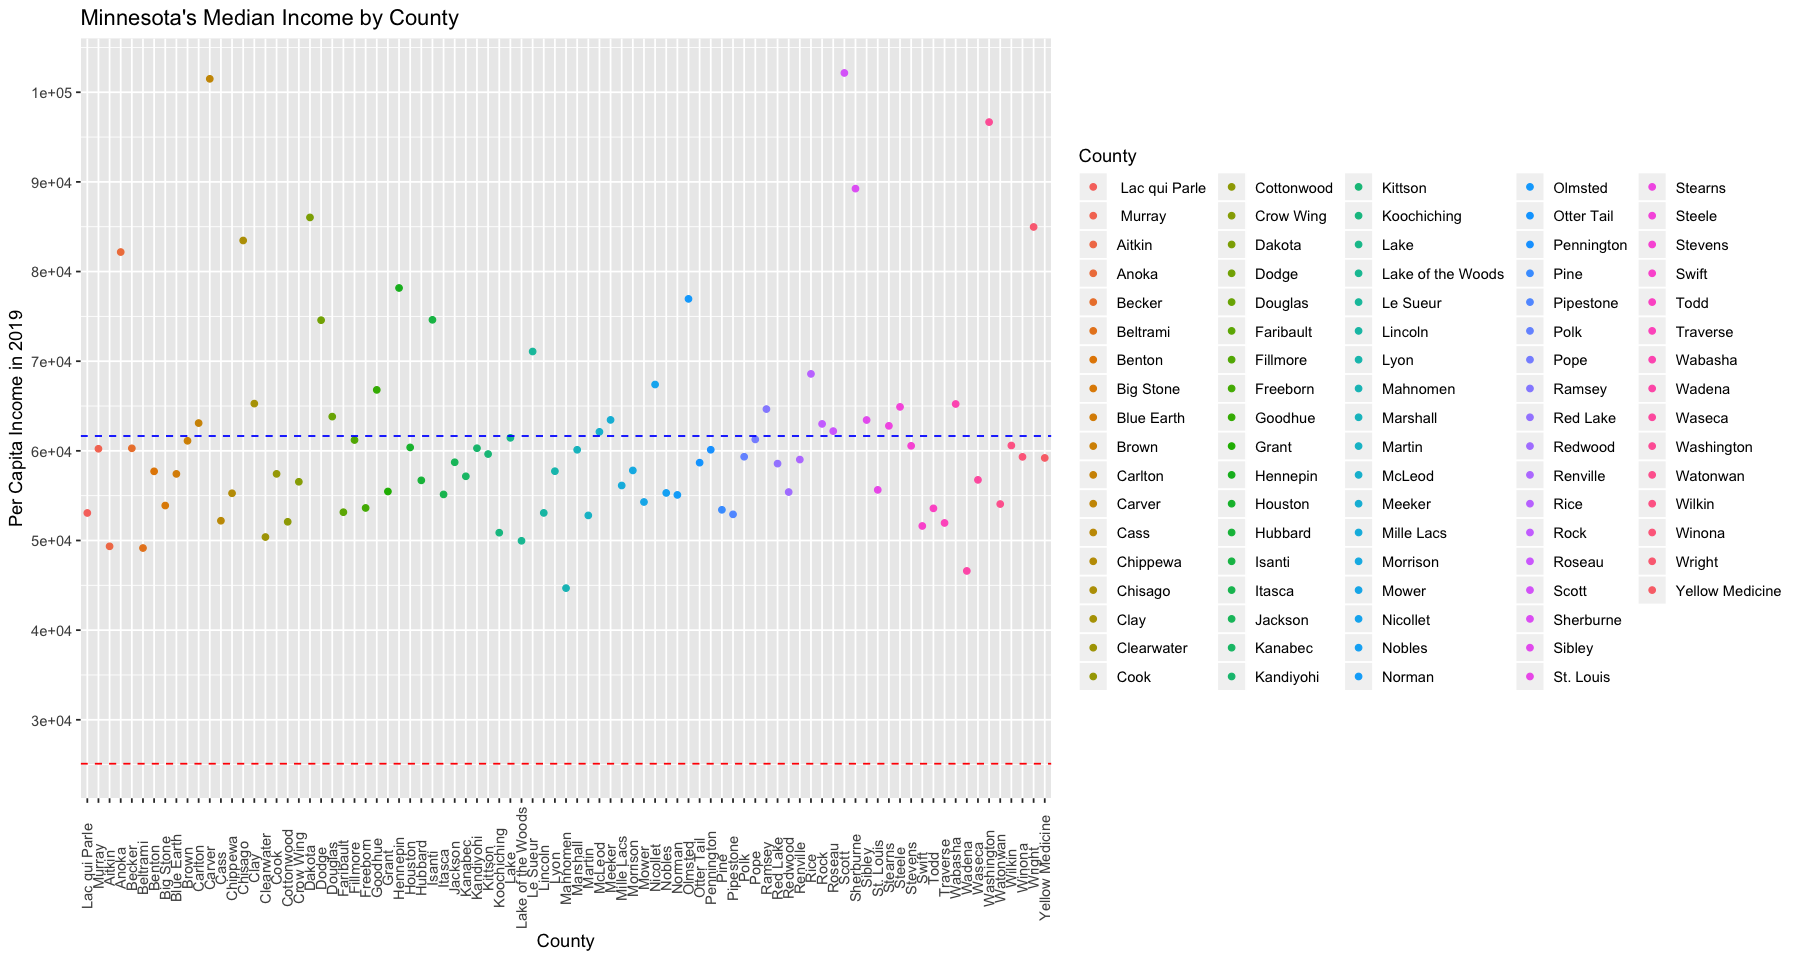

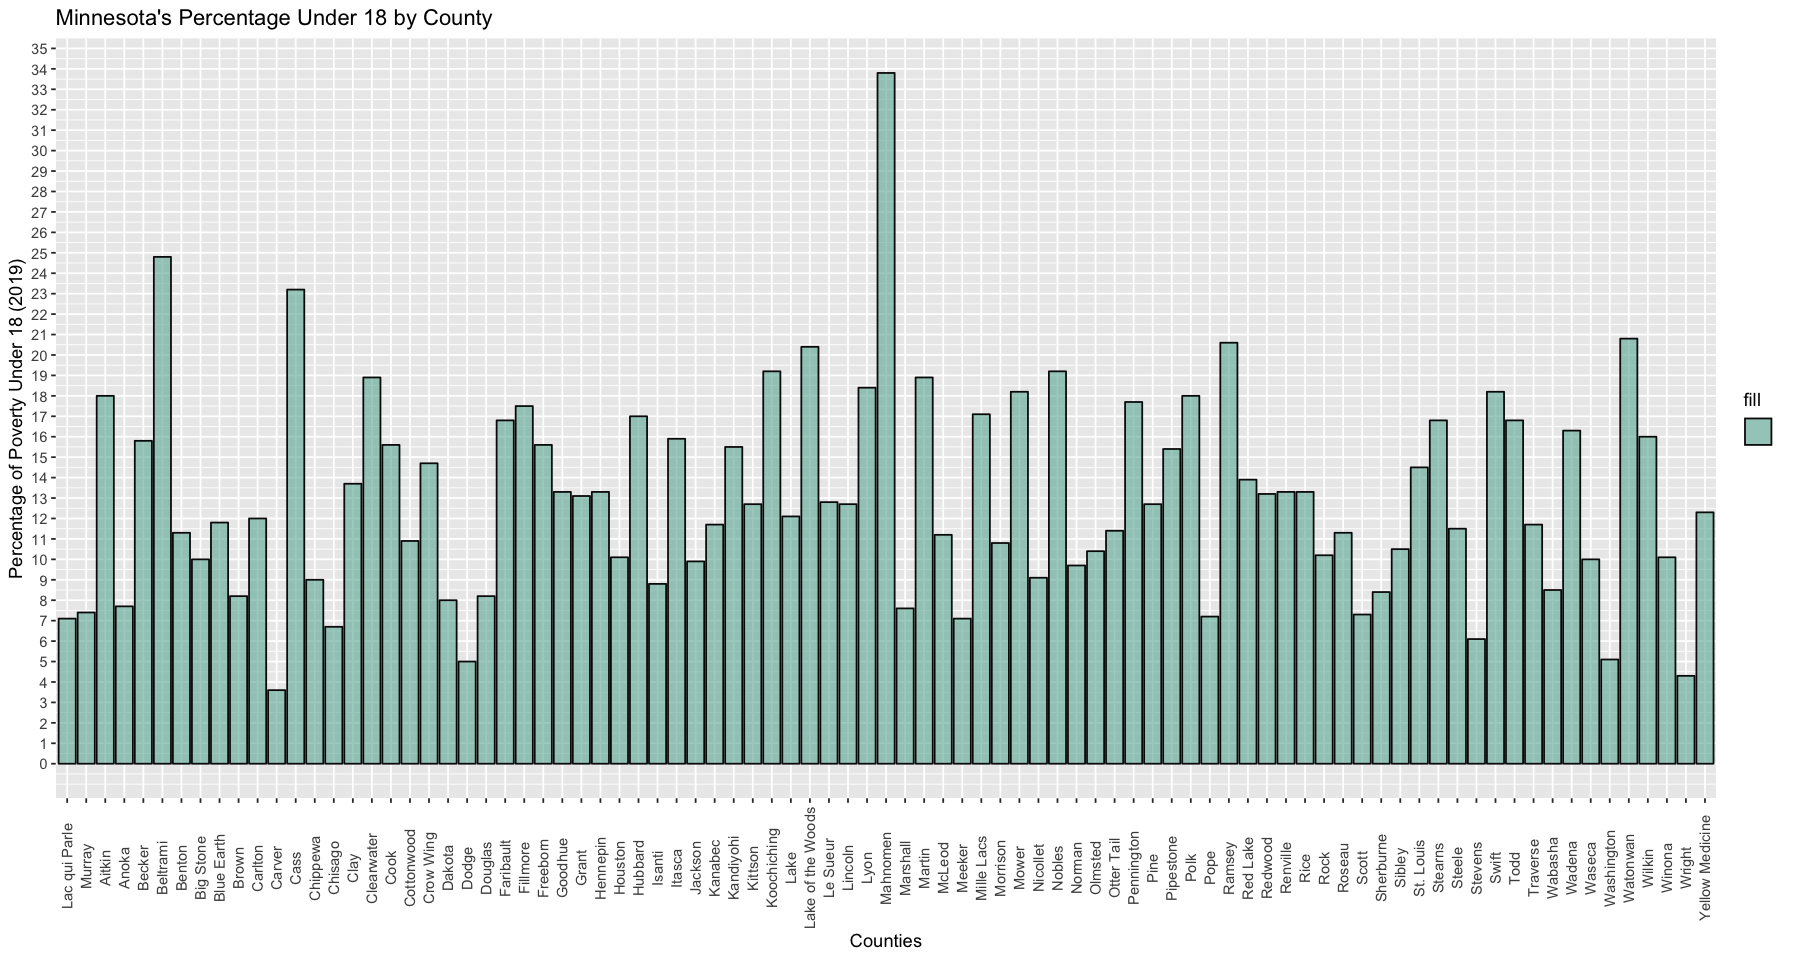

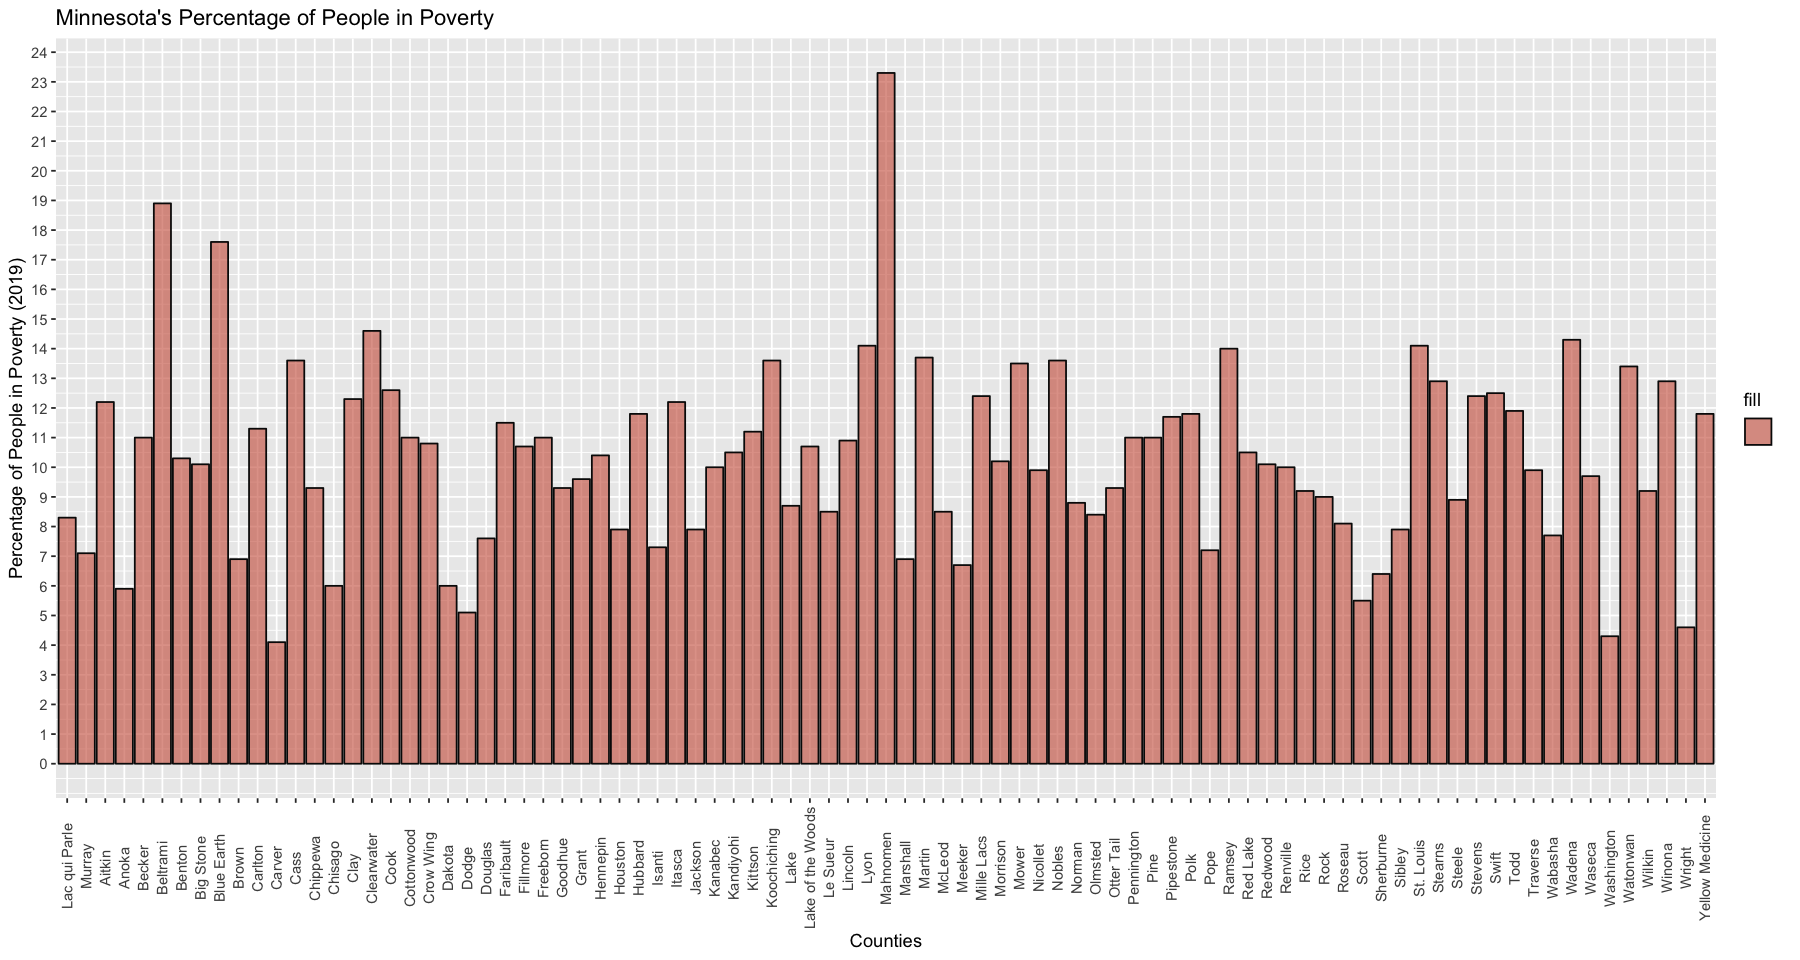

In [38]:
house = (select(minn, persons_per_household_2019))
#colMeans(house)

income = select(minn_poverty, median_household_income_2019)
#colMeans(income)

# Plot for Minnesota's Median Income by County
plot1 <- ggplot(minn_poverty, aes(minn_poverty$names, minn_poverty$median_household_income_2019
                                  ,color=minn_poverty$names)) + 
geom_point() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
geom_hline(yintercept=25100 , linetype="dashed", color = "red") +
geom_hline(yintercept=61656, linetype="dashed", color = "blue") + 
xlab("County") + ylab("Per Capita Income in 2019") + labs(color = "County") + 
ggtitle("Minnesota's Median Income by County")+
scale_y_continuous(breaks=seq(0,120000,10000)); 

# Plot for Minnesota's % under 18 who are in poverty
plot2 <- ggplot(minn_poverty, aes(x = minn_poverty$names, y = minn_poverty$poverty_under_18_2019,
                                 fill = '')) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'identity') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Counties") + 
    ylab("Percentage of Poverty Under 18 (2019)") + 
    ggtitle("Minnesota's Percentage Under 18 by County") +
    scale_y_continuous(breaks=seq(0,100));

# Histogram of % of population that are in poverty (by county)
plot3 <- ggplot(minn_poverty, aes(x = minn_poverty$names, y = minn_poverty$poverty_2019,
                                 fill = '')) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'identity') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("coral3")) + xlab("Counties") + 
    ylab("Percentage of People in Poverty (2019)") + 
    ggtitle("Minnesota's Percentage of People in Poverty") +
    scale_y_continuous(breaks=seq(0,100));

plot1
plot2
plot3

## Graphs of Different Age Groups in Poverty (2016, 2017, 2018, 2019)

In [39]:
# Selecting different age groups that are below poverty for 2016, 2017, 2019.
age16 = select(mdemo16, 'under_age_18_poverty', 
'under_age_5_poverty', 'age_18_to_64_poverty', 'age_65_and_older_poverty', 
    'age_18_to_34_poverty')

age17 = select(mdemo17, 'under_age_18_poverty', 
'under_age_5_poverty', 'age_18_to_64_poverty', 'age_65_and_older_poverty', 
    'age_18_to_34_poverty')

age18 = select(mdemo18, 'under_age_18_poverty', 
'under_age_5_poverty', 'age_18_to_64_poverty', 'age_65_and_older_poverty', 
    'age_18_to_34_poverty')

age19 = select(mdemo19, 'under_age_18_poverty', 
'under_age_5_poverty', 'age_18_to_64_poverty', 'age_65_and_older_poverty', 
    'age_18_to_34_poverty')

# Adjusting the Poverty rate for different age groups.
scale_age16 = (age16*minn_poverty$pop2016)
scale_age17 = (age17*minn_poverty$pop2017)
scale_age18 = (age18*mdemo18$pop2018)
scale_age19 = (age19*minn_poverty$pop_2019)

# Total Population for the whole state for each year.
total_pop16 = sum(minn_poverty$pop2016)
total_pop17 = sum(minn_poverty$pop2017)
total_pop18 = sum(mdemo18$pop2018)
total_pop19 = sum(minn_poverty$pop_2019)

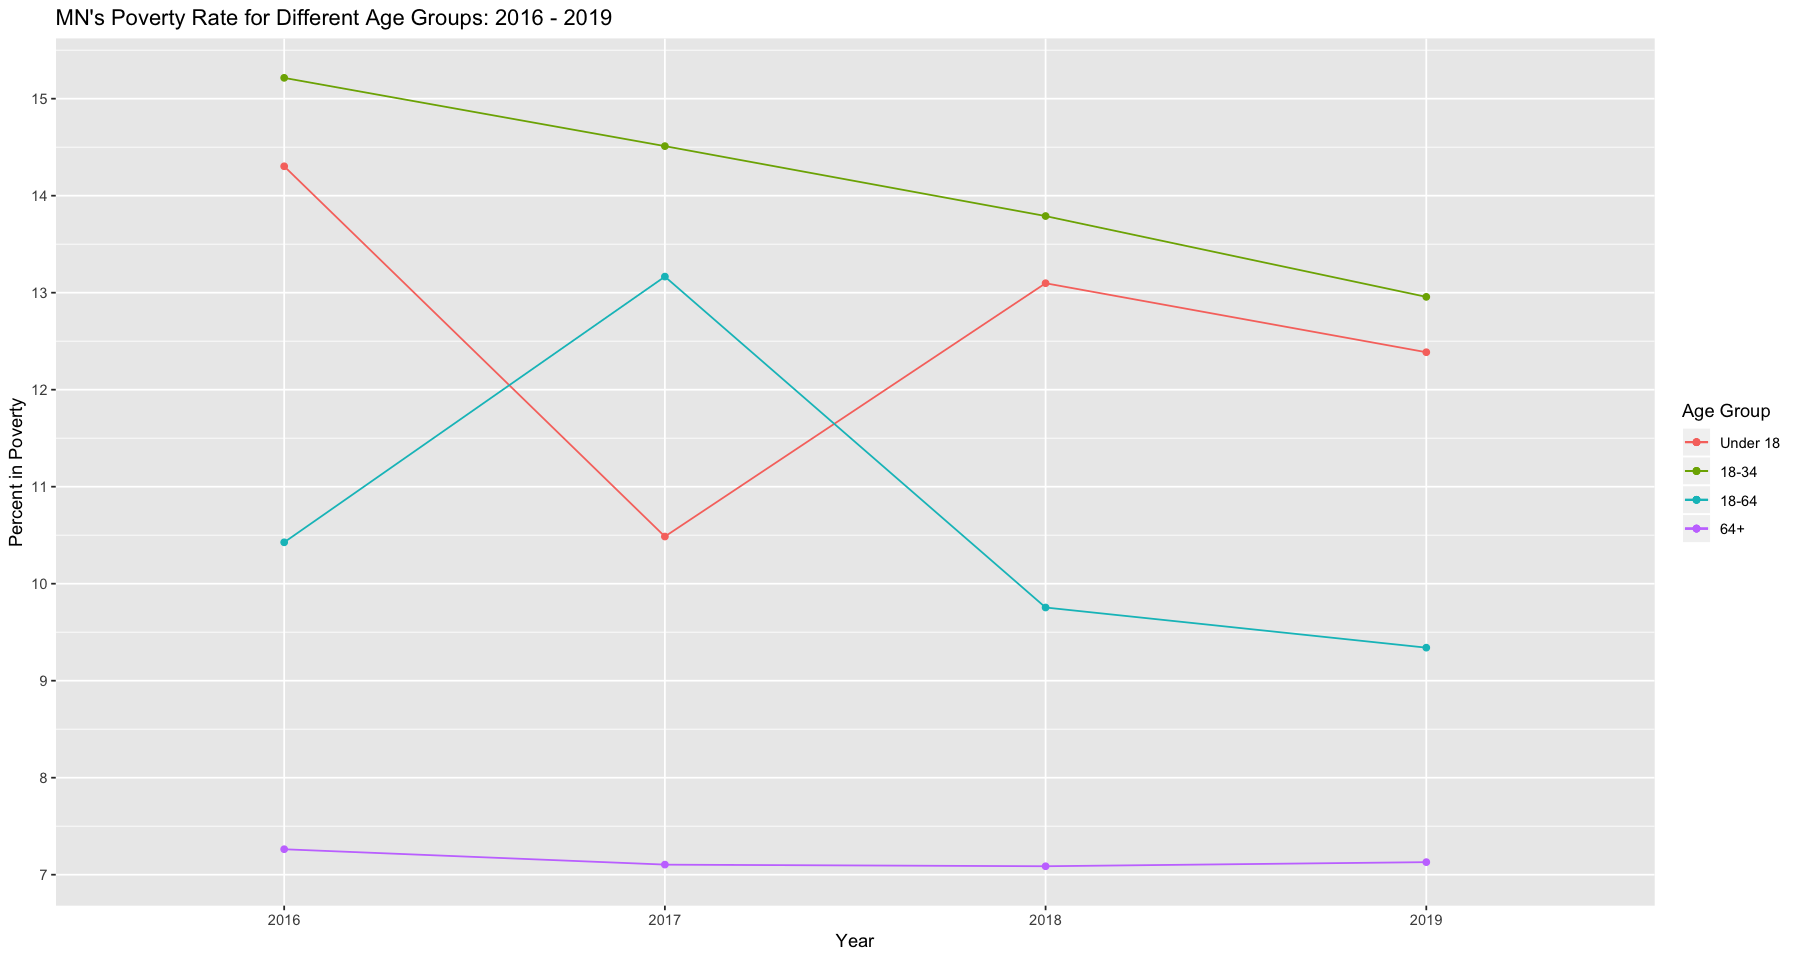

In [68]:
#label = c("MN's Total Population Ages: Under 18", "MN's Total Population Ages: 18-34", 
#         "MN's Total Population Ages: 18-64", "MN's Total Population Ages: 65+")

# Creating vectors for different ages of poverty, first, taking the sum of each column.
# them divide by the total population in order to obtain the total % of the WHOLE state.

a1 = c(sum(scale_age16$under_age_18_poverty)/total_pop16, 
       sum(scale_age17$under_age_18_poverty)/total_pop17,
       sum(scale_age18$under_age_18_poverty)/total_pop18,
       sum(scale_age19$under_age_18_poverty)/total_pop19)

a2 = c(sum(scale_age16$age_18_to_34_poverty)/total_pop16, 
       sum(scale_age17$age_18_to_34_poverty)/total_pop17, 
       sum(scale_age18$age_18_to_34_poverty)/total_pop18, 
       sum(scale_age19$age_18_to_34_poverty)/total_pop19)

a3 = c(sum(scale_age16$age_18_to_64_poverty)/total_pop16,
                  sum(scale_age17$age_18_to_64_poverty)/total_pop17,
                  sum(scale_age18$age_18_to_64_poverty)/total_pop18, 
                  sum(scale_age19$age_18_to_64_poverty)/total_pop19)

a4 = c(sum(scale_age16$age_65_and_older_poverty)/total_pop16,
        sum(scale_age17$age_65_and_older_poverty)/total_pop17,
                  sum(scale_age18$age_65_and_older_poverty)/total_pop18, 
                  sum(scale_age19$age_65_and_older_poverty)/total_pop19)

# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df1 = data.frame(Year, a1, a2, a3, a4)


p1 <- ggplot(data = df1, aes(x = Year)) +
        # "MN's Poverty Rate Age: Under 18"
        geom_point(aes(y = a1*100, color = "a1", group = 1)) +
        geom_line(aes(y = a1*100, color = "a1", group = 1)) +

        # "MN's Poverty Rate Age: 18-34"
        geom_point(aes(y = a2*100, color = "a2", group = 1)) +
        geom_line(aes(y = a2*100, color = "a2", group = 1)) +

        # "MN's Poverty Rate Age: 18-64"
        geom_point(aes(y = a3*100, color = "a3", group = 1)) +
        geom_line(aes(y = a3*100, color = "a3", group = 1)) +
    
        # "MN's Poverty Rate Age: 64+"
        geom_point(aes(y = a4*100, color = "a4", group = 1)) +
        geom_line(aes(y = a4*100, color = "a4", group = 1)) +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        scale_colour_discrete(name  = "Age Group",
                            breaks=c("a1", "a2", "a3", "a4"),
                            labels=c("Under 18", "18-34", "18-64", "64+")) +
        ggtitle("MN's Poverty Rate for Different Age Groups: 2016 - 2019")
p1

## Graphs of Different Ethnicities in Poverty (2016, 2017, 2018, 2019)

In [41]:
# Selecting different age groups that are below poverty for 2016, 2017, 2019.
race16 = select(mdemo16, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race17 = select(mdemo17, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race18 = select(mdemo18, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race19 = select(mdemo19, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

In [42]:

scale_race16 = (race16*minn_poverty$pop2016)
scale_race17 = (race17*minn_poverty$pop2017)
scale_race18 = (race18*mdemo18$pop2018)
scale_race19 = (race19*minn_poverty$pop_2019)

r1 = c(sum(scale_race16$white_alone)/total_pop16, 
       sum(scale_race17$white_alone)/total_pop17,
       sum(scale_race18$white_alone)/total_pop18,
       sum(scale_race19$white_alone)/total_pop19)

r2 = c(sum(scale_race16$black_or_african_american)/total_pop16, 
       sum(scale_race17$black_or_african_american)/total_pop17, 
       sum(scale_race18$black_or_african_american)/total_pop18, 
       sum(scale_race19$black_or_african_american)/total_pop19)

r3 = c(sum(scale_race16$american_indian_and_alaska_native)/total_pop16,
       sum(scale_race17$american_indian_and_alaska_native)/total_pop17,
       sum(scale_race18$american_indian_and_alaska_native)/total_pop18, 
       sum(scale_race19$american_indian_and_alaska_native)/total_pop19)

r4 = c(sum(scale_race16$asian)/total_pop16,
       sum(scale_race17$asian)/total_pop17,
       sum(scale_race18$asian)/total_pop18, 
       sum(scale_race19$asian)/total_pop19)

r5 = c(sum(scale_race16$native_hawaiian_pacific_islander)/total_pop16,
       sum(scale_race17$native_hawaiian_pacific_islander)/total_pop17,
       sum(scale_race18$native_hawaiian_pacific_islander)/total_pop18, 
       sum(scale_race19$native_hawaiian_pacific_islander)/total_pop19)

r6 = c(sum(scale_race16$hispanic_or_latino_origin)/total_pop16,
       sum(scale_race17$hispanic_or_latino_origin)/total_pop17,
       sum(scale_race18$hispanic_or_latino_origin)/total_pop18, 
       sum(scale_race19$hispanic_or_latino_origin)/total_pop19)

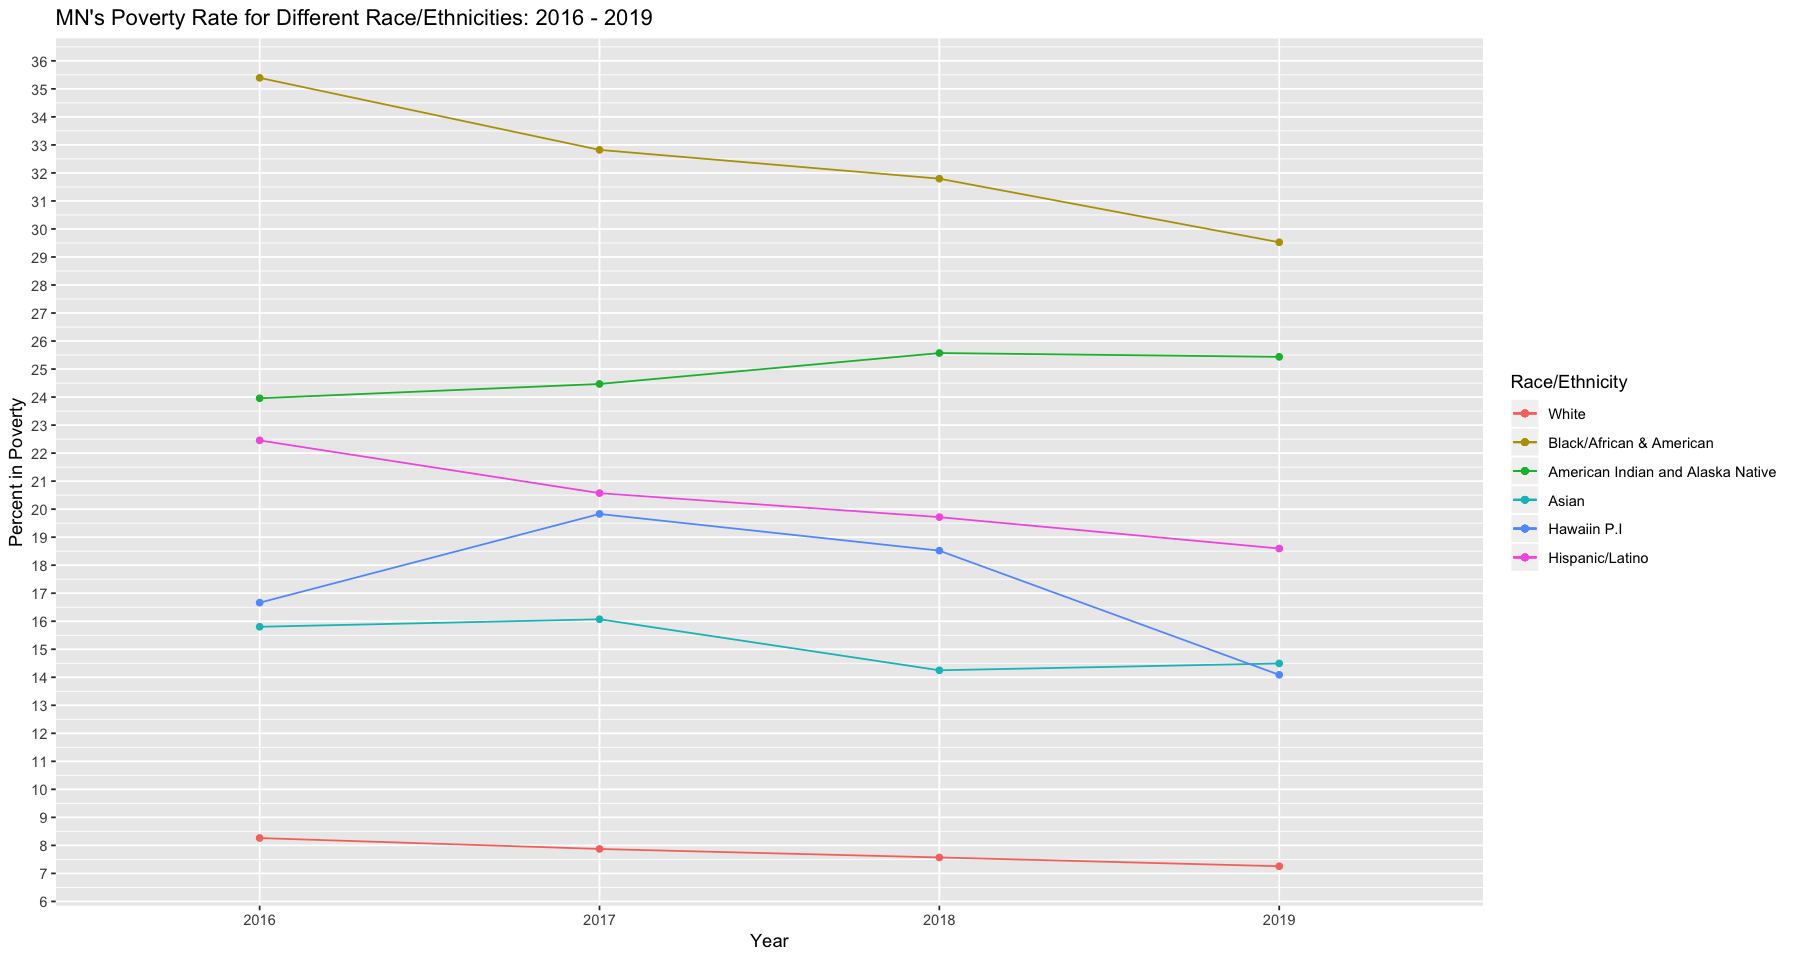

In [66]:
# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df2 = data.frame(Year, r1, r2, r3, r4, r5, r6)



p2 <- ggplot(data = df2, aes(x = Year)) +
        # "MN's Poverty Rate Race: White"
        geom_point(aes(y = r1*100, color = "r1", group = 1)) +
        geom_line(aes(y = r1*100, color = "r1", group = 1)) +

        # "MN's Poverty Rate Race: Black or African and American"
        geom_point(aes(y = r2*100, color = "r2", group = 1)) +
        geom_line(aes(y = r2*100, color = "r2", group = 1)) +

        # "MN's Poverty Rate Race: American Indian and Alaska Native"
        geom_point(aes(y = r3*100, color = "r3", group = 1)) +
        geom_line(aes(y = r3*100, color = "r3", group = 1)) +
    
        # "MN's Poverty Rate Race: Asian"
        geom_point(aes(y = r4*100, color = "r4", group = 1)) +
        geom_line(aes(y = r4*100, color = "r4", group = 1)) +
        
        # "MN's Poverty Rate Race: Native Hawaiian Pacific Islander"
        geom_point(aes(y = r5*100, color = "r5", group = 1)) +
        geom_line(aes(y = r5*100, color = "r5", group = 1)) +
        
        # "MN's Poverty Rate Race: Hispanic or Latino"
        geom_point(aes(y = r6*100, color = "r6", group = 1)) +
        geom_line(aes(y = r6*100, color = "r6", group = 1)) +
        scale_colour_discrete(name  = "Race/Ethnicity",
                            breaks=c("r1", "r2", "r3", "r4", "r5", "r6"),
                            labels=c("White", "Black/African & American", 
                                     "American Indian and Alaska Native", "Asian", 
                                     "Hawaiin P.I","Hispanic/Latino")) +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        ggtitle("MN's Poverty Rate for Different Race/Ethnicities: 2016 - 2019")

p2

## Graphs for Poverty with the Highest Level of Education (2016, 2017, 2018, 2019)

In [48]:
education16 = select(demo2016, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education17 = select(demo2017, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education18 = select(demo2018, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education19 = select(demo2019, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')

scale_edu16 = (education16*minn_poverty$pop2016)
scale_edu17 = (education17*minn_poverty$pop2017)
scale_edu18 = (education18*mdemo18$pop2018)
scale_edu19 = (education19*minn_poverty$pop_2019)

In [49]:
e1 = c(sum(scale_edu16$less_than_hs_graduate)/total_pop16, 
       sum(scale_edu17$less_than_hs_graduate)/total_pop17,
       sum(scale_edu18$less_than_hs_graduate)/total_pop18,
       sum(scale_edu19$less_than_hs_graduate)/total_pop19)

e2 = c(sum(scale_edu16$hs_graduate)/total_pop16, 
       sum(scale_edu17$hs_graduate)/total_pop17, 
       sum(scale_edu18$hs_graduate)/total_pop18, 
       sum(scale_edu19$hs_graduate)/total_pop19)

e3 = c(sum(scale_edu16$some_college_or_associate)/total_pop16,
       sum(scale_edu17$some_college_or_associate)/total_pop17,
       sum(scale_edu18$some_college_or_associate)/total_pop18, 
       sum(scale_edu19$some_college_or_associate)/total_pop19)

e4 = c(sum(scale_edu16$bachelor_or_higher)/total_pop16,
       sum(scale_edu17$bachelor_or_higher)/total_pop17,
       sum(scale_edu18$bachelor_or_higher)/total_pop18, 
       sum(scale_edu19$bachelor_or_higher)/total_pop19)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

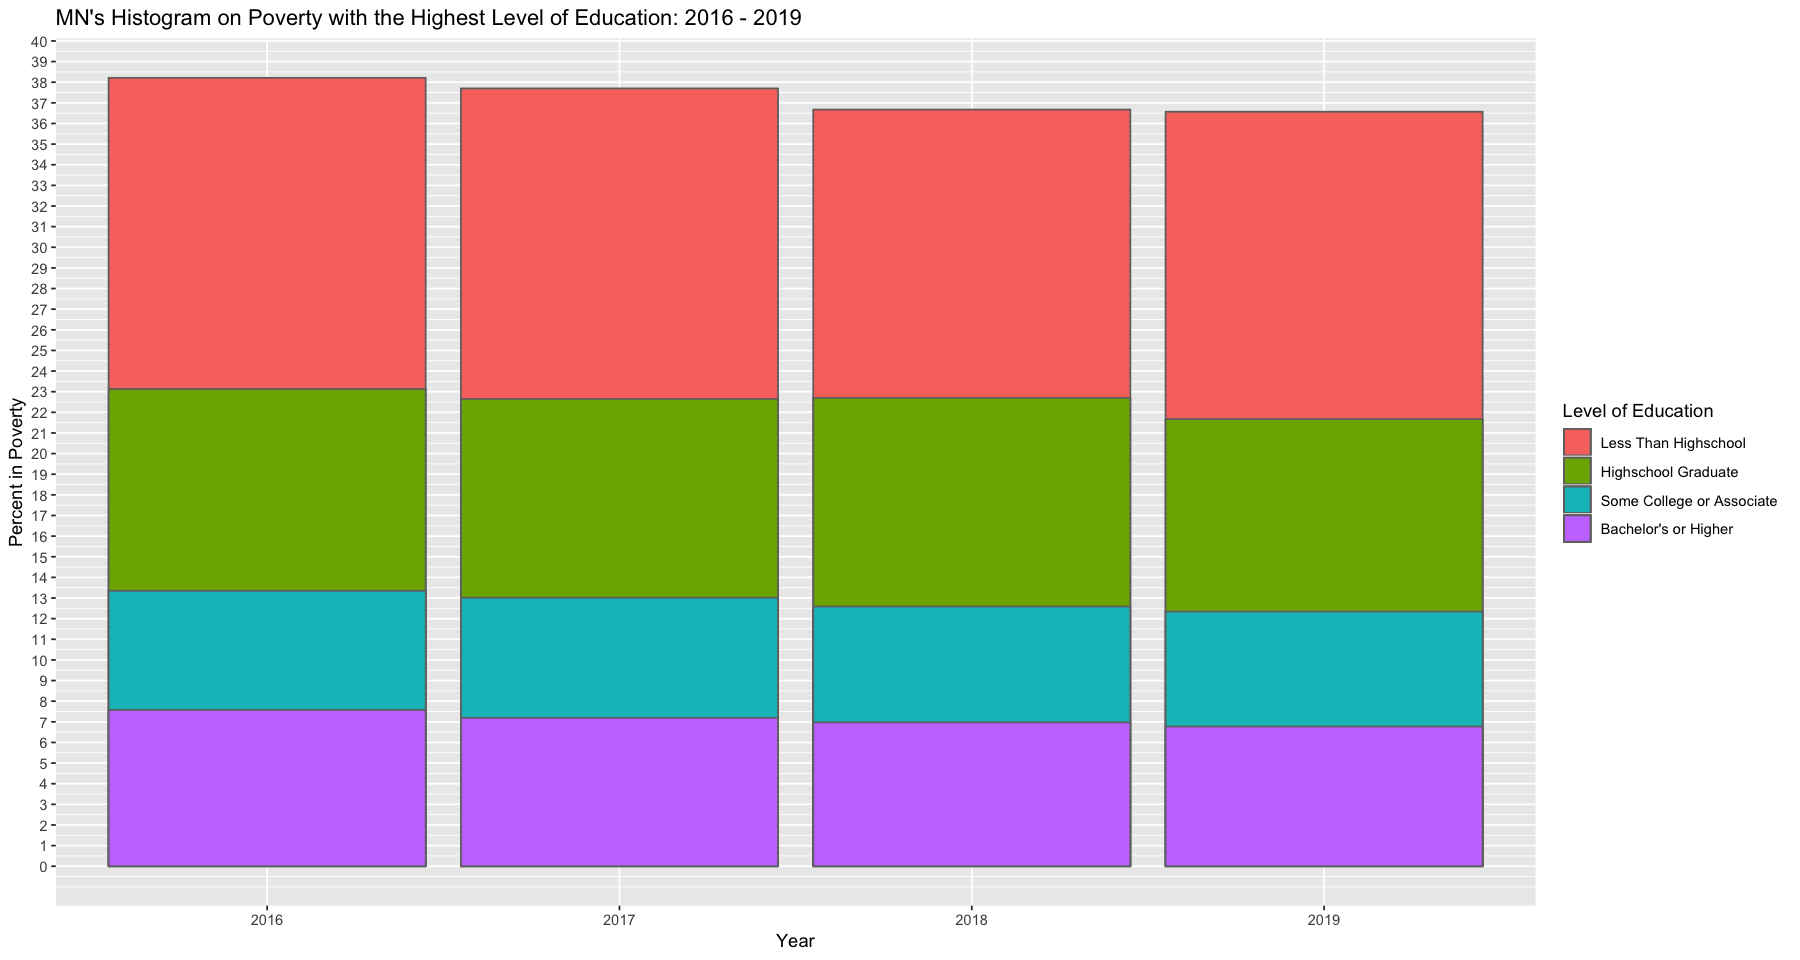

In [74]:
# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df3 = data.frame(Year, e1, e2, e3, e4)



p3 <- ggplot(data = df3, aes(x = Year)) +
        # "MN's Poverty Rate Education Level: Less Than Highschool"
        geom_histogram(aes(y = e1*100, fill = "e1"), color = "grey44", stat = 'identity') +

        # "MN's Poverty Rate Educaton Level: Highschool Graduate"
        geom_histogram(aes(y = e2*100, fill = "e2"), color = "grey44", stat = 'identity') +

        # "MN's Poverty Rate Educaton Level: Some College or Associate"
        geom_histogram(aes(y = e3*100, fill = "e3"), color = "grey44", stat = 'identity') +
    
        # "MN's Poverty Rate Educaton Level: Bachelor's or Higher"
        geom_histogram(aes(y = e4*100, fill = "e4"), color = "grey44", stat = 'identity') +

        scale_fill_discrete(name  = "Level of Education",
                            breaks=c("e1", "e2", "e3", "e4", "e5", "e6"),
                            labels=c("Less Than Highschool", "Highschool Graduate", 
                                     "Some College or Associate", "Bachelor's or Higher", 
                                     "Hawaiin P.I","Hispanic/Latino")) +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        ggtitle("MN's Histogram on Poverty with the Highest Level of Education: 2016 - 2019")
p3